In [6]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, UpSampling2D, Flatten, Input, MaxPooling2D
from tensorflow.keras.activations import softmax, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
import os

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import numpy as np
import sys
import tensorflow
print(tensorflow.__version__)

2.3.0


In [2]:
# if running like python file.py
# base_path = os.path.abspath(os.path.dirname(__file__))
# print(base_path)

#if running in shell/jupyter
exec_path = os.getcwd()
print(exec_path)

C:\Users\akash\Downloads\keras tips and tricks\classify objects in video


In [3]:
data_gen = ImageDataGenerator(rescale=1./255, validation_split=.3, 
                              rotation_range=90, horizontal_flip=True, 
                              vertical_flip=True, zca_whitening=True)
train_data_gen = data_gen.flow_from_directory(directory="C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Data/",
                             color_mode='rgb',
                             classes=['baseball', 'hockey'],
                             class_mode='categorical',
                             batch_size=32,
                             shuffle=False,
                             interpolation='nearest',
                             subset='training')

test_data_gen = data_gen.flow_from_directory(directory="C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Data/",
                                             target_size=(256,256),
                                             color_mode='rgb',
                                             classes=['baseball', 'hockey'],
                                             class_mode='categorical',
                                             batch_size=32,
                                             shuffle=False, interpolation='nearest',
                                             subset='validation')

Found 911 images belonging to 2 classes.
Found 389 images belonging to 2 classes.


c:\users\akash\downloads\env\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
print("Training class info:\n Image shape: {}\n Class Indices: {}\n Class Mode: {}\n Data Format: {}\n".format(
    train_data_gen.image_shape, train_data_gen.class_indices, train_data_gen.class_mode, train_data_gen.data_format))
print(train_data_gen.num_classes)
print(train_data_gen.n)

Training class info:
 Image shape: (256, 256, 3)
 Class Indices: {'baseball': 0, 'hockey': 1}
 Class Mode: categorical
 Data Format: channels_last

2
911


In [5]:
# We will use transfer learning to accelerate our training and model accuracy. 
# We are going to use ResNet 50 Layer model 

input_tensor = Input(shape=(256,256,3))
baseline_model = ResNet50(weights='imagenet', include_top=False, input_tensor= input_tensor)
head_model = baseline_model.output
head_model = MaxPooling2D(pool_size=(2,2))(head_model)
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(100, activation='relu')(head_model)
head_model = Dense(50, activation='relu')(head_model)
head_model = Dropout(0.4)(head_model)
head_model = Dense(train_data_gen.num_classes, activation='softmax')(head_model)

model = Model(inputs=baseline_model.input, outputs=head_model)

for layer in baseline_model.layers:
    layer.trainable = True

In [ ]:
def define_model():
    model = Conv

In [6]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen, epochs=10, steps_per_epoch=train_data_gen.n//train_data_gen.batch_size, validation_data=test_data_gen, verbose=1, 
                    validation_steps=test_data_gen.n//test_data_gen.batch_size)


c:\users\akash\downloads\env\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\users\akash\downloads\env\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
28/28 [==============================] - 470s 17s/step - loss: 7.5320 - accuracy: 0.4994 - val_loss: 78073.1328 - val_accuracy: 0.4297
Epoch 2/10
28/28 [==============================] - 480s 17s/step - loss: 0.8833 - accuracy: 0.4844 - val_loss: 1707.2123 - val_accuracy: 0.4297
Epoch 3/10
28/28 [==============================] - 496s 18s/step - loss: 0.7811 - accuracy: 0.5336 - val_loss: 0.7043 - val_accuracy: 0.4714
Epoch 4/10
28/28 [==============================] - 488s 17s/step - loss: 0.7119 - accuracy: 0.5199 - val_loss: 0.6915 - val_accuracy: 0.5703
Epoch 5/10
28/28 [==============================] - 469s 17s/step - loss: 0.7114 - accuracy: 0.5210 - val_loss: 0.6911 - val_accuracy: 0.5703
Epoch 6/10
28/28 [==============================] - 487s 17s/step - loss: 0.6919 - accuracy: 0.5597 - val_loss: 0.6901 - val_accuracy: 0.5703
Epoch 7/10
28/28 [==============================] - 521s 19s/step - loss: 0.6974 - accuracy: 0.5666 - val_loss: 0.6896 - val_accuracy: 0.5703

In [7]:
model.save('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Model/assets


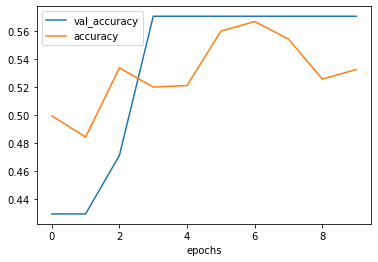

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt 

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.legend(['val_accuracy', 'accuracy'])
plt.show()
plt.clf()

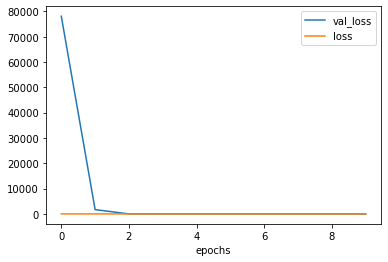

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['val_loss', 'loss'])
plt.show()
plt.clf()

Now we are going to test out model on video. 
For this to work, we need to 
1. use OpenCV so that we can extract the images from the videos.
2. take frame and pass it through the model.predict.
3. Show the output image with legend == predicted class

In [1]:
import cv2
from tensorflow.keras.models import load_model
from collections import deque
import numpy as np
import argparse
import pickle

model = load_model('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Model/')
mean = np.array([123.68, 116.779, 103.939], dtype='float32')
print(mean)
label = ['baseball', 'hockey']
writer = None
(W, H) = (None, None)
video = cv2.VideoCapture('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/video/videoplayback (2).mp4')
i = 0

while(True):
    ret, frames = video.read()
    if ret == False:
        print("Failed to read the video")
        break
    # if the frame dimensions are empty, grab them
    if W is None or H is None:
        (H, W) = frames.shape[:2]
    output = frames.copy()
    # cv2.imwrite('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Data/baseball/image{}.png'.format(i), frames)
    frame_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
    resized_frame = np.resize(frame_rgb, new_shape=(1,256,256,3)).astype('float32')
    # resized_frame -= mean
    # print(resized_frame.shape)
    pred = model.predict(resized_frame, verbose=1)
    print(pred)
    
    class_indices = np.argmax(pred)
    print(class_indices)
    # 
    # if class_indices == 0:
    #     text = 'Baseball'
    #     print(text)
    # else:
    #     text = 'hockey'
    #     print(text)
    cv2.putText(output, label[class_indices], (35, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0, 255, 0), 5)
    
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter("file_test.mp4", fourcc, 30, (W, H), True)

    # write the output frame to disk
    writer.write(output)
    cv2.imshow('frame',output)
    i += 1
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

writer.release()
video.release()
# cv2.destroyAllWindows()

[123.68  116.779 103.939]
1/1 [==============================] - 0s 0s/step
[[0.8544973  0.14550267]]
0
1/1 [==============================] - 0s 999us/step
[[0.856075   0.14392501]]
0
1/1 [==============================] - 0s 528us/step
[[0.85556775 0.14443229]]
0
1/1 [==============================] - 0s 1ms/step
[[0.8527646  0.14723536]]
0
1/1 [==============================] - 0s 2ms/step
[[0.854874   0.14512596]]
0
1/1 [==============================] - 0s 999us/step
[[0.85417247 0.14582758]]
0
1/1 [==============================] - 0s 2ms/step
[[0.83097833 0.16902167]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7947055  0.20529449]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7509002  0.24909982]]
0
1/1 [==============================] - 0s 2ms/step
[[0.69314325 0.30685678]]
0
1/1 [==============================] - 0s 2ms/step
[[0.683836   0.31616396]]
0
1/1 [==============================] - 0s 2ms/step
[[0.70261866 0.2973813 ]]
0
1/1 [================

1/1 [==============================] - 0s 2ms/step
[[0.44419852 0.5558015 ]]
1
1/1 [==============================] - 0s 2ms/step
[[0.36822185 0.6317781 ]]
1
1/1 [==============================] - 0s 2ms/step
[[0.6316042  0.36839586]]
0
1/1 [==============================] - 0s 2ms/step
[[0.76849854 0.23150146]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8157308  0.18426916]]
0
1/1 [==============================] - 0s 3ms/step
[[0.81489056 0.18510945]]
0
1/1 [==============================] - 0s 2ms/step
[[0.81395847 0.18604152]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8126682 0.1873318]]
0
1/1 [==============================] - 0s 2ms/step
[[0.81217587 0.1878241 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.80008566 0.19991434]]
0
1/1 [==============================] - 0s 2ms/step
[[0.80499893 0.19500105]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8188895  0.18111053]]
0
1/1 [==============================] - 0s 2ms/step
[[0

[[0.5777513 0.4222487]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5787929  0.42120704]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5766252 0.4233747]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5774612  0.42253876]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5784188 0.4215812]]
0
1/1 [==============================] - 0s 2ms/step
[[0.57901347 0.42098656]]
0
1/1 [==============================] - 0s 2ms/step
[[0.58061284 0.41938716]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5817306  0.41826943]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5821108 0.4178892]]
0
1/1 [==============================] - 0s 2ms/step
[[0.58452034 0.4154797 ]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5857156  0.41428438]]
0
1/1 [==============================] - 0s 3ms/step
[[0.58014876 0.41985118]]
0
1/1 [==============================] - 0s 2ms/step
[[0.58154094 0.41845912]]
0
1/1 [===========================

1/1 [==============================] - 0s 2ms/step
[[0.7314509  0.26854914]]
0
1/1 [==============================] - 0s 998us/step
[[0.73992664 0.26007336]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7683932  0.23160675]]
0
1/1 [==============================] - 0s 3ms/step
[[0.77605945 0.22394055]]
0
1/1 [==============================] - 0s 2ms/step
[[0.80644184 0.19355813]]
0
1/1 [==============================] - 0s 2ms/step
[[0.80054206 0.19945794]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7568 0.2432]]
0
1/1 [==============================] - 0s 2ms/step
[[0.79099476 0.20900522]]
0
1/1 [==============================] - 0s 3ms/step
[[0.76855886 0.23144117]]
0
1/1 [==============================] - 0s 2ms/step
[[0.77131635 0.22868368]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7749881  0.22501181]]
0
1/1 [==============================] - 0s 2ms/step
[[0.79080784 0.20919217]]
0
1/1 [==============================] - 0s 3ms/step
[[0.806

1/1 [==============================] - 0s 2ms/step
[[0.7882415  0.21175851]]
0
1/1 [==============================] - 0s 2ms/step
[[0.78009385 0.21990615]]
0
1/1 [==============================] - 0s 2ms/step
[[0.78200805 0.21799195]]
0
1/1 [==============================] - 0s 2ms/step
[[0.76769555 0.23230444]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7654338  0.23456621]]
0
1/1 [==============================] - 0s 2ms/step
[[0.76902974 0.23097025]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7588385  0.24116154]]
0
1/1 [==============================] - 0s 999us/step
[[0.74119633 0.2588037 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.74172634 0.2582737 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7391693 0.2608306]]
0
1/1 [==============================] - 0s 2ms/step
[[0.74096996 0.25903004]]
0
1/1 [==============================] - 0s 998us/step
[[0.74432564 0.2556744 ]]
0
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step
[[0.5784781  0.42152193]]
0
1/1 [==============================] - 0s 2ms/step
[[0.56886834 0.4311317 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5743512  0.42564878]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5422116  0.45778844]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5878497  0.41215032]]
0
1/1 [==============================] - 0s 3ms/step
[[0.59011346 0.40988654]]
0
1/1 [==============================] - 0s 3ms/step
[[0.54338235 0.45661774]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5588325  0.44116744]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5877089  0.41229102]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5683227  0.43167725]]
0
1/1 [==============================] - 0s 2ms/step
[[0.550812 0.449188]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5459038  0.45409614]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5

1/1 [==============================] - 0s 2ms/step
[[0.78210133 0.21789868]]
0
1/1 [==============================] - 0s 2ms/step
[[0.75662947 0.24337055]]
0
1/1 [==============================] - 0s 2ms/step
[[0.76021373 0.23978628]]
0
1/1 [==============================] - 0s 2ms/step
[[0.762276   0.23772396]]
0
1/1 [==============================] - 0s 998us/step
[[0.758106   0.24189398]]
0
1/1 [==============================] - 0s 2ms/step
[[0.72074187 0.27925813]]
0
1/1 [==============================] - 0s 2ms/step
[[0.79626834 0.2037317 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.81779927 0.18220074]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8319196  0.16808042]]
0
1/1 [==============================] - 0s 2ms/step
[[0.84548444 0.1545156 ]]
0
1/1 [==============================] - 0s 3ms/step
[[0.83278066 0.1672193 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8557349 0.1442651]]
0
1/1 [==============================] - 0s 2ms/step
[

1/1 [==============================] - 0s 2ms/step
[[0.70523185 0.29476815]]
0
1/1 [==============================] - 0s 2ms/step
[[0.68943787 0.31056207]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6696114  0.33038858]]
0
1/1 [==============================] - 0s 2ms/step
[[0.68131614 0.3186839 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6883009  0.31169906]]
0
1/1 [==============================] - 0s 1000us/step
[[0.68663776 0.31336227]]
0
1/1 [==============================] - 0s 2ms/step
[[0.69078565 0.30921435]]
0
1/1 [==============================] - 0s 2ms/step
[[0.68756366 0.31243637]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6861131  0.31388697]]
0
1/1 [==============================] - 0s 3ms/step
[[0.6864304  0.31356955]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6865249 0.3134751]]
0
1/1 [==============================] - 0s 2ms/step
[[0.68839604 0.31160402]]
0
1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 2ms/step
[[0.7446208  0.25537926]]
0
1/1 [==============================] - 0s 2ms/step
[[0.74722326 0.25277668]]
0
1/1 [==============================] - 0s 3ms/step
[[0.7514994  0.24850053]]
0
1/1 [==============================] - 0s 3ms/step
[[0.75565904 0.24434099]]
0
1/1 [==============================] - 0s 2ms/step
[[0.75619763 0.2438023 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7599987  0.24000132]]
0
1/1 [==============================] - 0s 2ms/step
[[0.75672483 0.24327523]]
0
1/1 [==============================] - 0s 2ms/step
[[0.75613093 0.24386908]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7520113  0.24798866]]
0
1/1 [==============================] - 0s 2ms/step
[[0.75333333 0.24666665]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7505817  0.24941832]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7412261  0.25877395]]
0
1/1 [==============================] - 0s 2ms/step
[

1/1 [==============================] - 0s 4ms/step
[[0.8045587 0.1954413]]
0
1/1 [==============================] - 0s 3ms/step
[[0.83466095 0.16533905]]
0
1/1 [==============================] - 0s 3ms/step
[[0.853213   0.14678693]]
0
1/1 [==============================] - 0s 4ms/step
[[0.83165944 0.1683405 ]]
0
1/1 [==============================] - 0s 3ms/step
[[0.829098   0.17090198]]
0
1/1 [==============================] - 0s 3ms/step
[[0.79429257 0.20570739]]
0
1/1 [==============================] - 0s 3ms/step
[[0.8184342 0.1815658]]
0
1/1 [==============================] - 0s 4ms/step
[[0.83628744 0.16371258]]
0
1/1 [==============================] - 0s 2ms/step
[[0.8221895  0.17781052]]
0
1/1 [==============================] - 0s 2ms/step
[[0.81807804 0.18192202]]
0
1/1 [==============================] - 0s 2ms/step
[[0.81636006 0.18363999]]
0
1/1 [==============================] - 0s 2ms/step
[[0.83358777 0.16641223]]
0
1/1 [==============================] - 0s 3ms/step
[[0.8

[[0.6437845  0.35621548]]
0
1/1 [==============================] - ETA:  - 0s 2ms/step
[[0.6285286  0.37147135]]
0
1/1 [==============================] - 0s 2ms/step
[[0.60666203 0.39333797]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6028173 0.3971827]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6405366  0.35946336]]
0
1/1 [==============================] - 0s 1ms/step
[[0.6572823 0.3427177]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6903464  0.30965355]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6519576 0.3480424]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6592825  0.34071743]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6096495  0.39035052]]
0
1/1 [==============================] - 0s 2ms/step
[[0.59728557 0.40271446]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5987891  0.40121084]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5963124 0.4036876]]
0
1/1 [===================

[[0.65105593 0.34894404]]
0
1/1 [==============================] - 0s 2ms/step
[[0.68914735 0.31085268]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6715279  0.32847205]]
0
1/1 [==============================] - 0s 2ms/step
[[0.67346376 0.3265363 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.6693621 0.3306379]]
0
1/1 [==============================] - 0s 3ms/step
[[0.69991887 0.30008116]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7025133 0.2974867]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7351459  0.26485413]]
0
1/1 [==============================] - 0s 2ms/step
[[0.71327394 0.28672606]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7174115  0.28258848]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7064762 0.2935238]]
0
1/1 [==============================] - 0s 2ms/step
[[0.74375045 0.25624958]]
0
1/1 [==============================] - 0s 2ms/step
[[0.74265647 0.2573435 ]]
0
1/1 [=========================

1/1 [==============================] - 0s 2ms/step
[[0.725691   0.27430895]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7766755  0.22332448]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7869714 0.2130286]]
0
1/1 [==============================] - 0s 2ms/step
[[0.79521525 0.20478475]]
0
1/1 [==============================] - 0s 2ms/step
[[0.79236543 0.2076346 ]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7886406  0.21135934]]
0
1/1 [==============================] - 0s 2ms/step
[[0.77803653 0.22196347]]
0
1/1 [==============================] - 0s 9ms/step
[[0.73695654 0.26304352]]
0
1/1 [==============================] - 0s 1000us/step
[[0.71045804 0.28954196]]
0
1/1 [==============================] - 0s 3ms/step
[[0.7424568  0.25754324]]
0
1/1 [==============================] - 0s 2ms/step
[[0.7860259  0.21397418]]
0
1/1 [==============================] - 0s 2ms/step
[[0.78857553 0.2114245 ]]
0
1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step
[[0.5820288  0.41797113]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5806186  0.41938144]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5767775  0.42322245]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5624864 0.4375136]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5629517 0.4370483]]
0
1/1 [==============================] - 0s 3ms/step
[[0.55257845 0.44742152]]
0
1/1 [==============================] - 0s 999us/step
[[0.55321544 0.44678462]]
0
1/1 [==============================] - ETA:  - 0s 2ms/step
[[0.55729896 0.44270098]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5514824  0.44851762]]
0
1/1 [==============================] - 0s 2ms/step
[[0.56125903 0.4387409 ]]
0
1/1 [==============================] - 0s 3ms/step
[[0.5719931 0.4280069]]
0
1/1 [==============================] - 0s 2ms/step
[[0.5727694  0.42723063]]
0
1/1 [==============================] - 0s 2ms/st

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Model/')

image = cv2.imread('C:/Users/akash/Downloads/keras tips and tricks/classify objects in video/Data/hockey/00000080.jpg')
new_image = np.resize(image, (1, 256,256,3)).astype('float32')
predicted_class = model.predict(new_image, verbose=1)
clas = np.argmax(predicted_class)
predicted_class

1/1 [==============================] - 0s 999us/step


array([[0.5215311 , 0.47846887]], dtype=float32)

In [4]:
clas

0